<a href="https://colab.research.google.com/github/fopdf/theory-of-control/blob/main/Lyapunov_based_%D1%81ontrol_of_a_reaction_wheel_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Метод функций Ляпунова: управление перевёрнутым маятником(колесом)**

## Теорема Ляпунова

Рассмотрим систему
$$\dot{x} = f(x)$$

и её равновесие $x = 0$.

Пусть существует функция  $V(x,t)$ такая что
$$\left\{ \tag{1}
\begin{array}\\
V(x) > 0, \qquad x >0 \\
V(x) = 0, \qquad x = 0
\end{array}
\right.$$

Рассмотрим её производную по времени в силу уравнений движения ($\dot{x}$ будем заменять на $f(x)$)
$$\dot{V}(x) = \sum_{i} \frac{\partial V}{\partial x}\cdot \dot{x} = \sum_{i} \frac{\partial V}{\partial x}\cdot f(x) = \nabla{V} \cdot f(x)$$

Потребовав 

$$\nabla{V} \cdot f(x) < 0 \tag{2}$$ 

мы обеспечим сходимость траекторий к нулю.

Таким образом, существование функции $V(x)$, удовлетворяющей условиям (1) и (2) гарантирует асимптотическую устойчивость нулевого равновесия системы. Функция $V(x)$ в этом случае называется функцией Ляпунова.


Рассматриваемая система:

**Перевернутый маятник**

$\ddot{\varphi} = a sin(\varphi) - bu$
$\tag{3}$
$\ddot{\theta}$ = cu

a, b и c - константы, связанные с физическими параметрами системы.


$x_{1} = \varphi$

$x_{2} = \dot{x_{1}}$

$x_{3} = \dot{\theta}$

$\tag{4}$
Но $x_{3}$ мы можем представить в виде

$x_{3} = c  \int_{t_{0}}^{t} u(s)ds$$\tag{5}$

Поэтому систему мы можем описать 

$
\dot{x}_1 = x_2\\
\dot{x}_2=asinx_1-bu\\
$$\tag{6}$

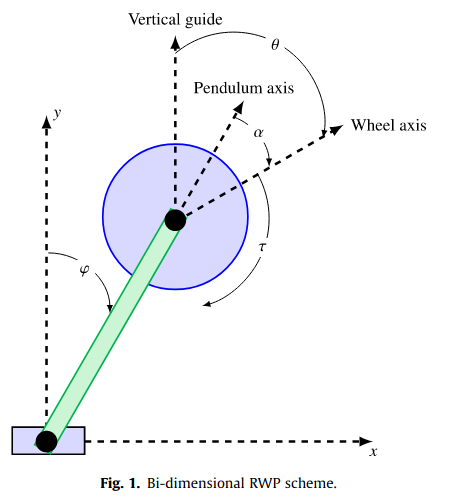

# Динамическая система


$$\left\{ 
\begin{array}\\
\dot{x}_1 = x_2\\
\dot{x}_2=asinx_1-bu\\
\end{array}
\right. $$$\tag{7}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

Параметры системы и начальные условия

In [ ]:
#a, b и c - константы, связанные с физическими параметрами системы
a = 78.4
b = 1.08
c = 198
# Начальные условия(исходное положение)
x = np.empty(2)
x[0] = 0.12
x[1] = 0

Рассматриваемые функции, которые могут являться функциями Ляпунова:

$V = \frac{(k_{1}x_{1}^2+x_{2}^2)}{2}+2asin^2(\frac{x_{1}}{2})$ $\tag{8}$

$V = \frac{(k_{1}x_{1}+k_{2}x_{2})^2}{2}$ $\tag{9}$

# Первая функция Ляпунова


$V = \frac{(k_{1}x_{1}^2+x_{2}^2)}{2}+2asin^2(\frac{x_{1}}{2})$

Возьмем производную и подставим выражение для $\dot{x_{2}}$:

$\dot{V} = x_{2}(k_{1}x_{1}-bu+2asinx_{1})$ $\tag{10}$

Выберем управление:

$u = \frac{1}{b}(k_{1}x_{1}+k_{2}x_{2}+2asinx_{1})$ $\tag{11}$

Получим

$\dot{V} = -k_{2}x_{2}^2$ $\tag{12}$

Такой выбор управления удовлетворяет условиям теоремы Ляпунова, что гарантирует нам асимптотическую устойчивость нулевого равновесия системы

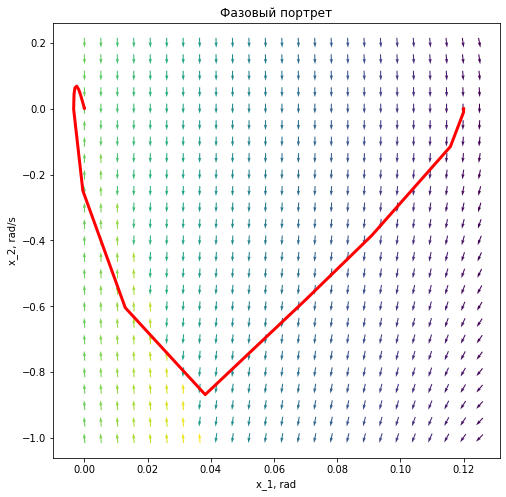

In [ ]:
# Controller Parameters
k1 = 3500
k2 = 135

#the limits of the control signal are assumed to be between 10 and 10

#control signal function
def u1(x):
  if (abs((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0]))) >= 10).any():
      return (np.sign((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0])))*10)
  else:
      return ((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0])))

# Dynamical model of an RWP
def equation(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]
    dxdt[1] = a*np.sin(x[0]) - b*u1(x)
    return dxdt

# Directions
def rhs1(x):
    return np.array([ x[1], a*np.sin(x[0]) - b*u1(x) ])

fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)

# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(0, 0.125, 25)
x2 = np.linspace(-1, 0.2, 25)

X1, X2  = np.meshgrid(x1, x2)                   
DX1, DX2 = (rhs1([X1, X2]))
M = (np.hypot(DX1, DX2))                        
M[ M == 0] = 1.                                 
DX1 /= M                                        
DX2 /= M

ax1.set_title("Фазовый портрет")
ax1.set_xlabel('x_1, rad')
ax1.set_ylabel('x_2, rad/s')
ax1.quiver(X1, X2, DX1, DX2, M, pivot='mid')

sol = solve_ivp(equation, (0, 10), x)
x = sol.y.T

ax1.plot(x[:, 0], x[:, 1], color='red', linewidth = 3)

In [ ]:
time = np.linspace(0, 0.1, 304)

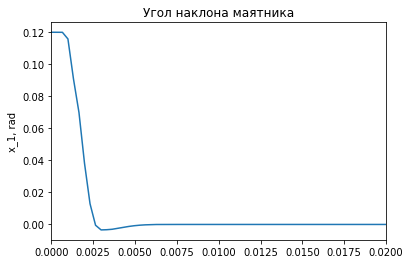

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_1, rad')
ax1.set_title('Угол наклона маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,0])

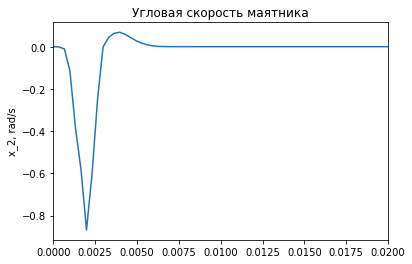

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_2, rad/s')
ax1.set_title('Угловая скорость маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,1])

In [ ]:
u = []
for i in x:
  u.append(u1(i))


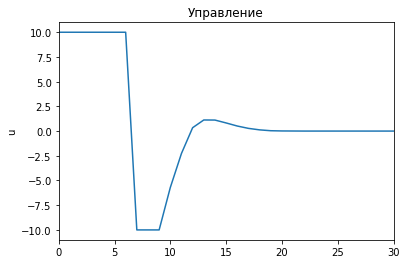

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('u')
ax1.set_title('Управление')
ax1.set_xlim([0, 30])
ax1.plot(u)

# Вторая функция Ляпунова


$V = \frac{(k_{1}x_{1}+k_{2}x_{2})^2}{2}$

Возьмем производную и подставим выражение для $\dot{x_{2}}$:
 
$\dot{V} = (k_{1}x_{1}+k_{2}x_{2})(k_{1}x_{2}+ak_{2}sinx_{1}-bk_{2}u)$ $\tag{13}$

Выберем управление:

$u = \frac{1}{b}(k_{1}x_{1}+k_{2}x_{2}+asinx_{1}+\frac{k_{1}}{k_{2}}x_{2})$ $\tag{14}$

Получим

$\dot{V} = -k_{2}(k_{1}x_{1}+k_{2}x_{2})^2$ $\tag{15}$

Аналогично выполняются условия теоремы Ляпунова

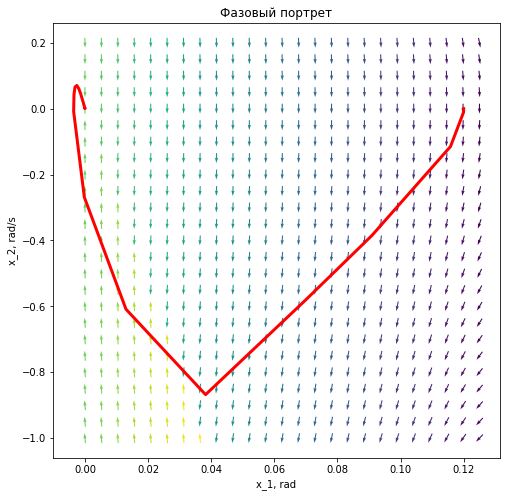

In [ ]:
k1 = 3500
k2 = 35
x = np.empty(2)
x[0] = 0.12
x[1] = 0

#the limits of the control signal are assumed to be between 10 and 10

#control signal function
def u2(x):
  if (abs((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2)) >= 10).any():
    return (np.sign((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2))*10)
  else:  
    return ((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2))

# Dynamical model of an RWP
def equation(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]
    dxdt[1] = a*np.sin(x[0]) - b*u2(x)
    return dxdt

# Directions
def rhs1(x):
    return np.array([ x[1], a*np.sin(x[0]) - b*u2(x) ])

fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(0, 0.125, 25)
x2 = np.linspace(-1, 0.2, 25)

X1, X2  = np.meshgrid(x1, x2)                   
DX1, DX2 = (rhs1([X1, X2]))
M = (np.hypot(DX1, DX2))                        
M[ M == 0] = 1.                                 
DX1 /= M                                        
DX2 /= M

ax1.set_title("Фазовый портрет")
ax1.set_xlabel('x_1, rad')
ax1.set_ylabel('x_2, rad/s')
ax1.quiver(X1, X2, DX1, DX2, M, pivot='mid')

sol = solve_ivp(equation, (0, 10), x)
x = sol.y.T

ax1.plot(x[:, 0], x[:, 1], color='red', linewidth = 3)

In [ ]:
time = np.linspace(0, 0.1, 308)

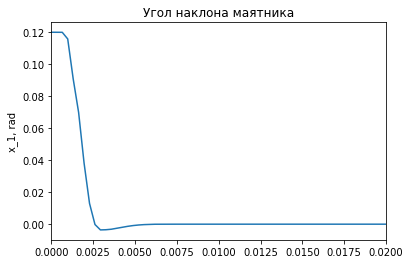

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_1, rad')
ax1.set_title('Угол наклона маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,0])

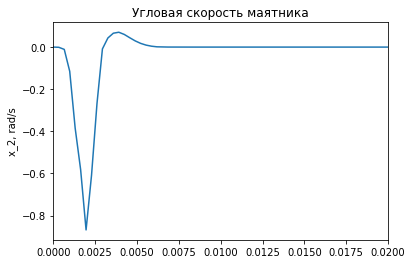

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_2, rad/s')
ax1.set_title('Угловая скорость маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,1])

In [ ]:
u = []
for i in x:
  u.append(u1(i))


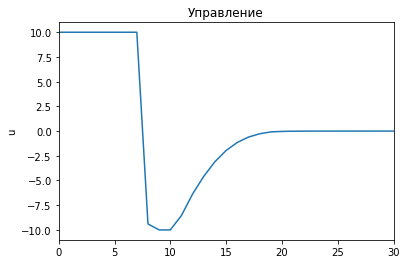

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('u')
ax1.set_title('Управление')
ax1.set_xlim([0, 30])
ax1.plot(u)

# Возмущения в параметрах, затрудняющие точное измерение состояния системы (дополненная динамическая система)

Меняются уравнения движения, функции управления остаются те же.
Когда возникают
возмущения, маятник колеблится сильнее и дольше приходит в стабильное состояние. В этой задаче также видно, что система стабильна, поскольку она также способна перемещаться от
начальных условий к началу координат.

$$\left\{ 
\begin{array}\\
\dot{x}_1 = x_2 +1.5x_{1}+1.5x_{2}\\
\dot{x}_2=asinx_1+1.5x_{1}+1.5x_{2}bu\\
\end{array}
\right.$$ $\tag{16}$

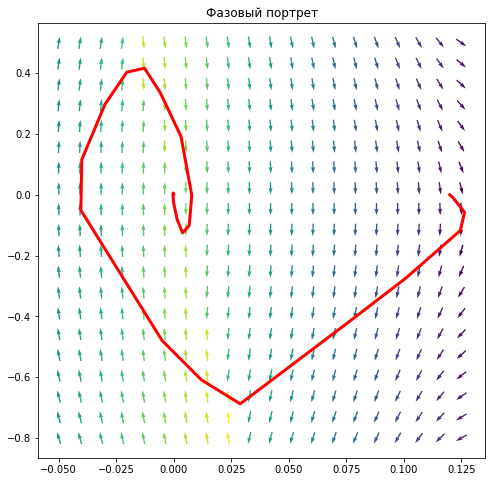

In [ ]:
k1 = 3500
k2 = 135
x = np.empty(2)
x[0] = 0.12
x[1] = 0

def u1(x):
  if (abs((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0]))) >= 10).any():
    return (np.sign((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0])))*10)
  else:  
    return ((1/b)*(k1*x[0]+k2*x[1]+2*a*np.sin(x[0])))

def equation(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]+1.5*x[0]+1.5*x[1]
    dxdt[1] = a*np.sin(x[0])+1.5*x[0]+1.5*x[1] - b*u1(x)
    return dxdt

def rhs1(x):
    return np.array([ x[1]+1.5*x[0]+1.5*x[1], a*np.sin(x[0]) - b*u1(x) ])

fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)

# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(-0.05, 0.125, 20)
x2 = np.linspace(-0.8, 0.5, 20)

X1, X2  = np.meshgrid(x1, x2)                   
DX1, DX2 = (rhs1([X1, X2]))
M = (np.hypot(DX1, DX2))                        
M[ M == 0] = 1.                                 
DX1 /= M                                        
DX2 /= M

ax1.set_title("Фазовый портрет")
ax1.quiver(X1, X2, DX1, DX2, M, pivot='mid')

sol = solve_ivp(equation, (0, 5), (x[0], x[1]))
x = sol.y.T

ax1.plot(x[:, 0], x[:, 1], color='red', linewidth = 3)

In [ ]:
time = np.linspace(0, 0.1, 159)

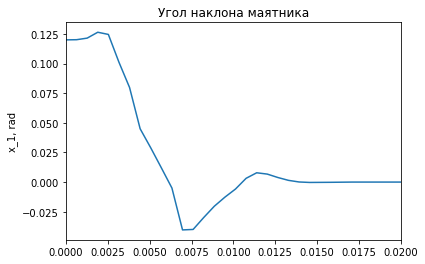

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_1, rad')
ax1.set_title('Угол наклона маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,0])

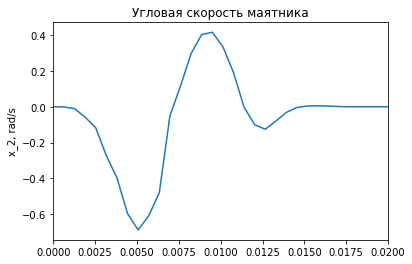

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_2, rad/s')
ax1.set_title('Угловая скорость маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,1])

In [ ]:
u = []
for i in x:
  u.append(u1(i))

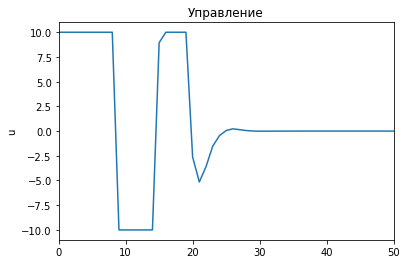

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('u')
ax1.set_title('Управление')
ax1.set_xlim([0, 50])
ax1.plot(u)

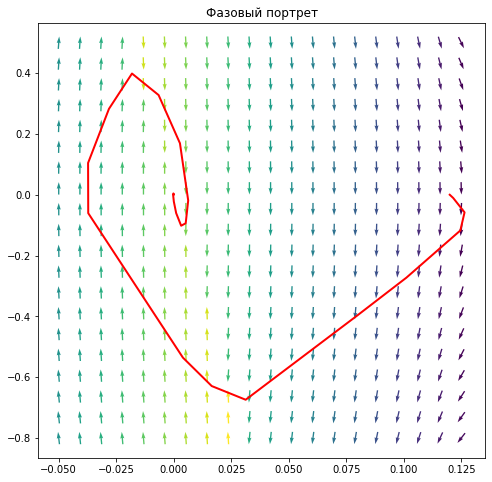

In [ ]:
k1 = 3500
k2 = 35
x = np.empty(2)
x[0] = 0.12
x[1] = 0

def u2(x):
  if (abs((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2)) >= 10).any():
    return (np.sign((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2))*10)
  else:  
    return ((1/b)*(k1*x[0]+k2*x[1]+a*np.sin(x[0])+x[1]*k1/k2))

def equation(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]+1.5*x[0]+1.5*x[1]
    dxdt[1] = a*np.sin(x[0])+1.5*x[0]+1.5*x[1] - b*u2(x)
    return dxdt

def rhs1(x):
    return np.array([ x[1], a*np.sin(x[0]) - b*u2(x) ])

fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(-0.05, 0.125, 20)
x2 = np.linspace(-0.8, 0.5, 20)

X1, X2  = np.meshgrid(x1, x2)                   
DX1, DX2 = (rhs1([X1, X2]))
M = (np.hypot(DX1, DX2))                        
M[ M == 0] = 1.                                 
DX1 /= M                                        
DX2 /= M

ax1.set_title("Фазовый портрет")
ax1.quiver(X1, X2, DX1, DX2, M, pivot='mid')

sol = solve_ivp(equation, (0, 5), (x[0], x[1]))
x = sol.y.T

ax1.plot(x[:, 0], x[:, 1], color='red', linewidth = 2)

In [ ]:
time = np.linspace(0, 0.1, 157)

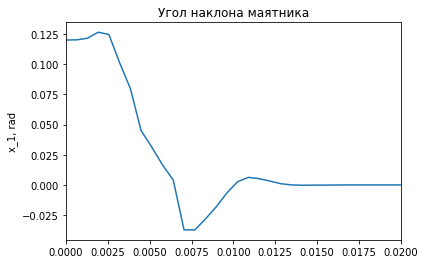

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_1, rad')
ax1.set_title('Угол наклона маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,0])

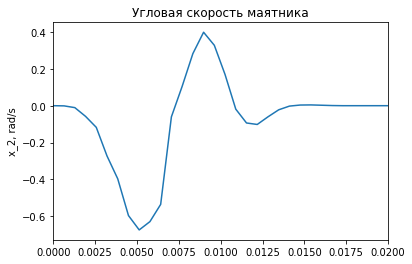

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_2, rad/s')
ax1.set_title('Угловая скорость маятника')
ax1.set_xlim([0, 0.02])
ax1.plot(time,x[:,1])

In [ ]:
u = []
for i in x:
  u.append(u1(i))

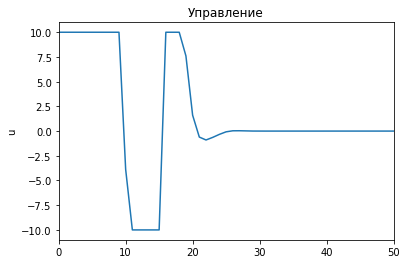

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('u')
ax1.set_title('Управление')
ax1.set_xlim([0, 50])
ax1.plot(u)

# Литература

1) [Nonlinear analysis and control of a reaction wheel pendulum:
Lyapunov-based approach. Oscar Danilo Montoya](https://repositorio.utb.edu.co/bitstream/handle/20.500.12585/8722/DOI10_1016j_jestch_2019_03_004.pdf?sequence=1&isAllowed=y) 

2) https://github.com/DPritykin/Control-Theory-Course

3)[The Reaction Wheel Pendulum. Daniel J. Block, Karl J. Åström, and Mark W. Spong](https://www.morganclaypool.com/doi/epdf/10.2200/S00085ED1V01Y200702CRM001)

4)[Linear control of the flywheel inverted pendulum. Manuel Olivares Pedro Albertos
](https://www.sciencedirect.com/science/article/pii/S0019057813002401)

